In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Pivot Table

`The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.`

In [2]:
df = sns.load_dataset("tips")

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.shape

(244, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
# Now if I want to see the average bill for Male and Female

df.groupby(by="sex")['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [6]:
df.groupby(by="sex")[['total_bill']].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [7]:
# Now if I want to see the average bill for Male and Female based on the smoking

df.groupby(by=['sex', 'smoker'])[['total_bill']].mean()

total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [8]:
df.groupby(by=['sex', 'smoker'])[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

### We can do above thing using pivot table using two way

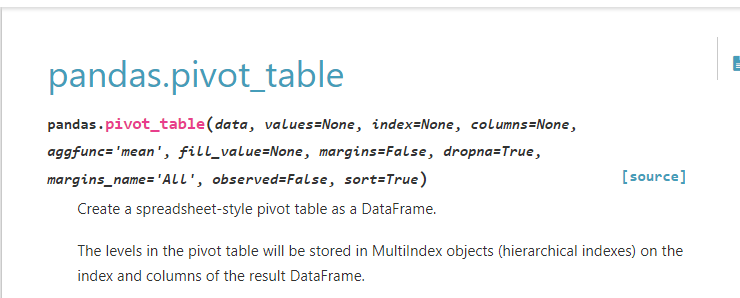
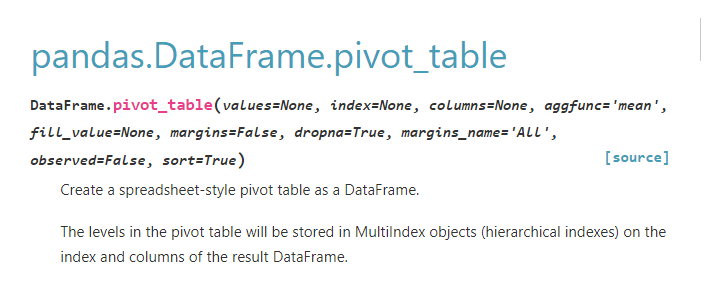

`those are same`

In [9]:
df.pivot_table(values="total_bill", index="sex", columns="smoker")

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [10]:
# we can apply aggfunc. By default aggfunc="mean"

df.pivot_table(values="total_bill", index="sex", columns="smoker", aggfunc="sum")

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [11]:
# We can apply all aggfunc whatever we want to apply

df.pivot_table(values="total_bill", index="sex", columns="smoker", aggfunc="std")

smoker,Yes,No
sex,,
Male,9.911845,8.726566
Female,9.189751,7.286455


In [12]:
# If we not pass the values then it will apply for all neumeric columns

df.pivot_table(index="sex", columns="smoker")

C:\Users\alami\AppData\Local\Temp\ipykernel_952\1715461696.py:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index="sex", columns="smoker")


size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [13]:
# We can extract individual portion

df.pivot_table(index="sex", columns="smoker")['size']

C:\Users\alami\AppData\Local\Temp\ipykernel_952\594408535.py:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index="sex", columns="smoker")['size']


smoker,Yes,No
sex,,
Male,2.500000,2.711340
Female,2.242424,2.592593


In [14]:
df.pivot_table(columns="smoker")

C:\Users\alami\AppData\Local\Temp\ipykernel_952\3783149409.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(columns="smoker")


smoker,Yes,No
size,2.408602,2.668874
tip,3.008710,2.991854
total_bill,20.756344,19.188278


In [15]:
# multidimensional

df.pivot_table(index=['sex','smoker'], columns=['day','time'], aggfunc={'size':'mean','tip':'max','total_bill':'sum'})

size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [16]:
# It will show total value also

df.pivot_table(values="total_bill", index="sex", columns="smoker", margins=True)

smoker,Yes,No,All
sex,,,
Male,22.284500,19.791237,20.744076
Female,17.977879,18.105185,18.056897
All,20.756344,19.188278,19.785943


### plotting graphs

In [17]:
df2 = pd.read_csv("Datasets/expense_data.csv")

df2.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [18]:
df2.shape

(277, 11)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [20]:
df2['Category'].value_counts()

Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: Category, dtype: int64

<AxesSubplot: >

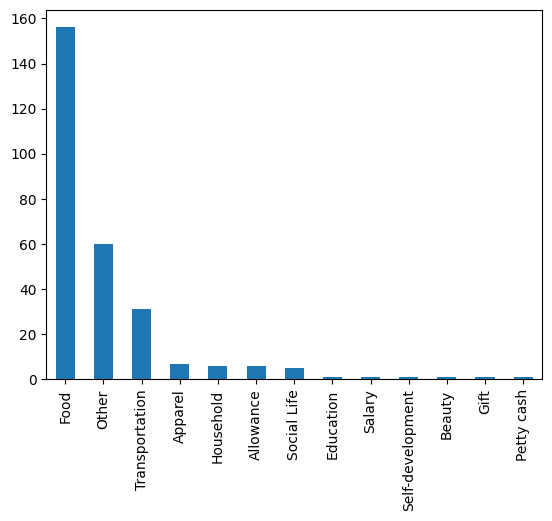

In [21]:
df2['Category'].value_counts().plot(kind="bar")

In [22]:
# Change Date column into object to Datetime format

df2["Date"] = pd.to_datetime(df2["Date"])

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


### https://pandas.pydata.org/docs/reference/series.html#:~:text=sparse-,Datetimelike%20properties,-%23

In [23]:
# Extract the month name from Date column

df2["month"] = df2["Date"].dt.month_name()

df2.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [24]:
# Here we just seen the how much cost of INR based on Category for every month

df2.pivot_table(values="INR", index="month", columns="Category", aggfunc="sum")

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,NaN,6440.72,NaN,4800.0,1790.0,NaN,NaN,400.0,513.72,914.0
February,NaN,798.0,NaN,NaN,5579.85,NaN,2808.0,20000.0,NaN,NaN,NaN,1800.00,5078.8
January,1000.0,NaN,NaN,1400.0,9112.51,NaN,4580.0,13178.0,NaN,8000.0,NaN,200.00,2850.0
March,NaN,NaN,NaN,NaN,195.00,NaN,NaN,900.0,NaN,NaN,NaN,NaN,30.0
November,2000.0,NaN,NaN,NaN,3174.40,115.0,NaN,2000.0,3.0,NaN,NaN,NaN,331.0


In [25]:
df2.pivot_table(values="INR", index="month", columns="Category", aggfunc="sum", fill_value=0)

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000,2590,196,0,6440.72,0,4800,1790,0,0,400,513.72,914.0
February,0,798,0,0,5579.85,0,2808,20000,0,0,0,1800.00,5078.8
January,1000,0,0,1400,9112.51,0,4580,13178,0,8000,0,200.00,2850.0
March,0,0,0,0,195.00,0,0,900,0,0,0,0.00,30.0
November,2000,0,0,0,3174.40,115,0,2000,3,0,0,0.00,331.0


<AxesSubplot: xlabel='month'>

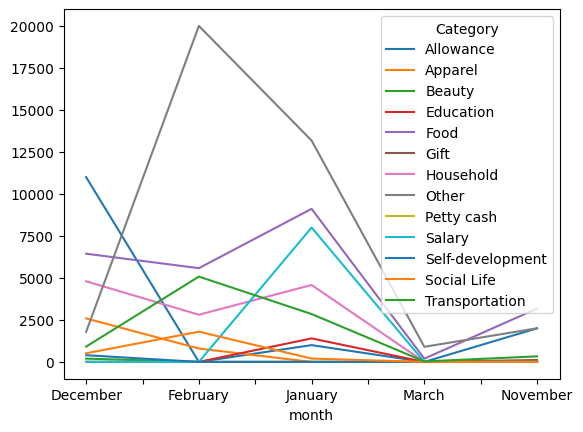

In [26]:
df2.pivot_table(values="INR", index="month", columns="Category", aggfunc="sum", fill_value=0).plot()

<AxesSubplot: xlabel='month'>

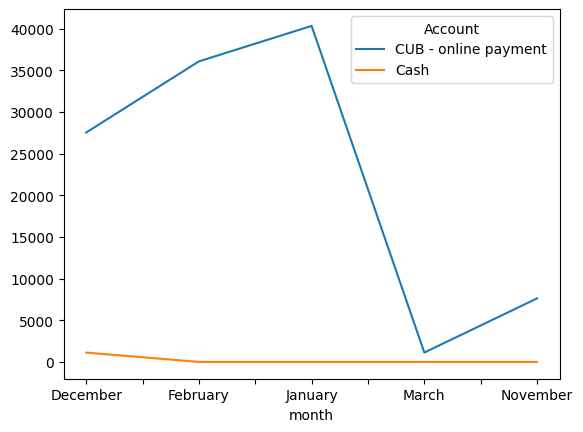

In [27]:
# Here we just seen the how much pay of INR based on Account for every month

df2.pivot_table(values="INR", index="month", columns="Account", aggfunc="sum", fill_value=0).plot()

<AxesSubplot: xlabel='month'>

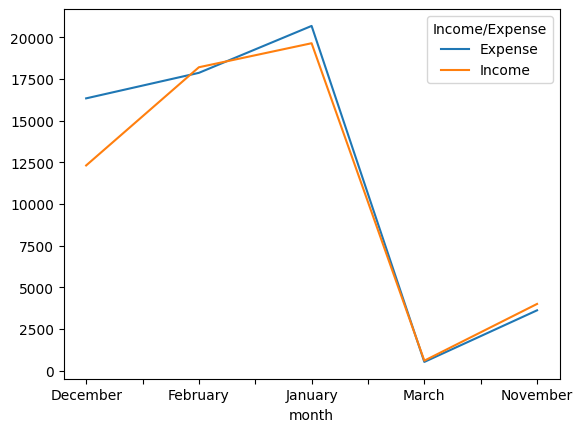

In [28]:
# Here we just seen the Income and Expense for very month

df2.pivot_table(values="INR", index="month", columns="Income/Expense", aggfunc="sum", fill_value=0).plot()